In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# I. Data Understanding

In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


## 1. Xét các dòng và các cột

In [3]:
n_rows , n_cols = hotel_df.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột')

Dữ liệu có 119390 dòng và 32 cột


## 2. Ý nghĩa của từng cột và hàng

In [4]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

+ Mỗi hàng là thông tin của 1 khách hàng đặt phòng khách 

+ Ý nghĩa của từng cột trong dữ liệu được tóm tắt trong bảng sau:

| **TÊN CỘT**                         | **MÔ TẢ**                                       | **KIỂU DỮ LIỆU**   |
|:---------------------------------|:---------------------------------------------|:----------------|
| **`hotel`**                           | Loại khách sạn                              | Chuỗi (String)|
| **`is_canceled`**                     | Đánh dấu liệu đặt phòng đã bị hủy          | Số nguyên (Integer)|
| **`lead_time`**                       | Thời gian từ đặt phòng đến nhận phòng      | Số nguyên (Integer)|
| **`arrival_date_year`**               | Năm của ngày nhận phòng                     | Số nguyên (Integer)|
| **`arrival_date_month`**              | Tháng của ngày nhận phòng                   | Chuỗi (String)|
| **`arrival_date_week_number`**        | Tuần trong năm của ngày nhận phòng          | Số nguyên (Integer)|
| **`arrival_date_day_of_month`**       | Ngày trong tháng của ngày nhận phòng        | Số nguyên (Integer)|
| **`stays_in_weekend_nights`**         | Số đêm nghỉ cuối tuần                       | Số nguyên (Integer)|
| **`stays_in_week_nights`**            | Số đêm nghỉ trong tuần                     | Số nguyên (Integer)|
| **`adults`**                          | Số người lớn                                | Số nguyên (Integer)|
| **`children`**                        | Số trẻ em                                   | Số nguyên (Integer)|
| **`babies`**                          | Số em bé                                    | Số nguyên (Integer)|
| **`meal`**                            | Loại bữa ăn đặt phòng                      | Chuỗi (String)|
| **`country`**                         | Quốc gia của khách hàng                     | Chuỗi (String)|
| **`market_segment`**                  | Phân khúc thị trường                        | Chuỗi (String)|
| **`distribution_channel`**            | Kênh phân phối                              | Chuỗi (String)|
| **`is_repeated_guest`**               | Đánh dấu liệu khách hàng là khách quen trở lại | Số nguyên (Integer)|
| **`previous_cancellations`**          | Số lần hủy đặt phòng trước đó của khách hàng | Số nguyên (Integer)|
| **`previous_bookings_not_canceled`** | Số lần đặt phòng trước đó không bị hủy của khách hàng | Số nguyên (Integer)|
| **`reserved_room_type`**              | Loại phòng được đặt trước                   | Chuỗi (String)|
| **`assigned_room_type`**              | Loại phòng được chỉ định cho khách hàng     | Chuỗi (String)|
| **`booking_changes`**                 | Số lần thay đổi đặt phòng                  | Số nguyên (Integer)|
| **`deposit_type`**                    | Loại tiền đặt cọc đã được thanh toán       | Chuỗi (String)|
| **`agent`**                           | Mã đại lý đặt phòng                         | Số nguyên (Integer)|
| **`company`**                         | Mã công ty đặt phòng                        | Số nguyên (Integer)|
| **`days_in_waiting_list`**            | Số ngày trong danh sách chờ                | Số nguyên (Integer)|
| **`customer_type`**                   | Loại khách hàng                             | Chuỗi (String)|
| **`adr`**                             | Tỉ lệ thuê phòng trung bình                | Số thập phân (Float)|
| **`required_car_parking_spaces`**     | Số lượng chỗ đậu xe cần thiết              | Số nguyên (Integer)|
| **`total_of_special_requests`**       | Tổng số yêu cầu đặc biệt                   | Số nguyên (Integer)|
| **`reservation_status`**              | Trạng thái của đặt phòng                   | Chuỗi (String)|
| **`reservation_status_date`**         | Ngày cập nhật trạng thái đặt phòng         | Chuỗi (String)|


## 3. Kiểm tra và xử lý trùng lắp dữ liệu (Duplicate)

In [5]:
duplicated_rows = hotel_df.duplicated().sum()

if duplicated_rows == 0:
    print('Không có hàng trùng lặp, nghĩa là mỗi hàng trong DataFrame là duy nhất.')
    print('Vì vậy chúng ta không cần tiếp tục xử lý các dòng trùng lặp')
else:
    print(f'Có {duplicated_rows} hàng trùng lặp chiếm tỷ lệ {np.round(duplicated_rows / hotel_df.shape[0] * 100, 2)} % vì vậy nên chúng ta sẽ xóa {duplicated_rows} hàng')
    hotel_df = hotel_df.drop_duplicates()
    print(f'Sau khi xóa các hàng trùng lặp, có {hotel_df.shape[0]} hàng còn lại')

Có 31994 hàng trùng lặp chiếm tỷ lệ 26.8 % vì vậy nên chúng ta sẽ xóa 31994 hàng
Sau khi xóa các hàng trùng lặp, có 87396 hàng còn lại


## 4. Phân tích tỷ lệ thiếu dữ liệu ở hàng và cột (Missing Values)

#### 👉Tỷ lệ thiếu ở các cột

In [6]:
missing_dict = {}

for col in hotel_df.columns:
    if type(hotel_df[col].iloc[0]) == list:
        missing_dict[col] = hotel_df[col].apply(lambda x: len(x) == 0).sum() / hotel_df.shape[0] * 100
    else:
        missing_dict[col] = hotel_df[col].isna().sum() / hotel_df.shape[0] * 100
        
missing_df = pd.DataFrame({'Missing Ratio (%)': missing_dict})
missing_df = missing_df.sort_values(by='Missing Ratio (%)', ascending=False)
missing_df = missing_df[missing_df['Missing Ratio (%)'] > 0]
missing_df

,Missing Ratio (%)
company,93.982562
agent,13.951439
country,0.517186
children,0.004577


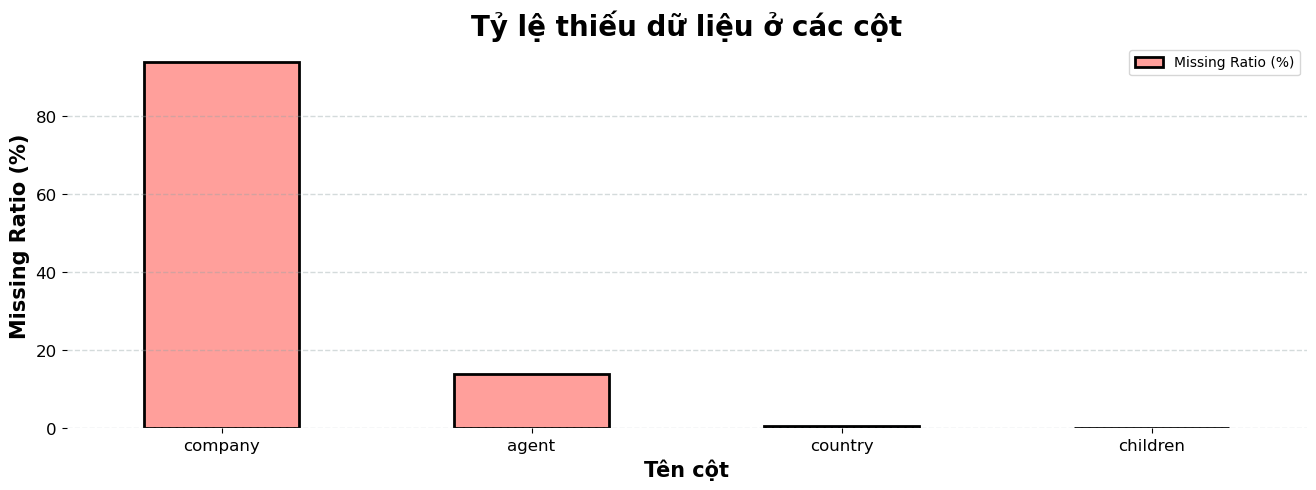

In [14]:
missing_ratio_df = missing_df.copy()
missing_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Tỷ lệ thiếu dữ liệu ở các cột', fontsize=20, fontweight='bold')
plt.xlabel('Tên cột', fontsize=15, weight='bold')
plt.ylabel('Missing Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()